# Compare EDS and EELS Spectra from Cr$_2$O$_3$
This notebook compares energy-dispersive x-ray spectroscopy (EDS) and electron energy loss spectroscopy (EELS) spectra.  
Here we use Cr$_2$O$_3$ as an example since it has a close overlap of Cr L$\alpha$ and O K$\alpha$ transitions in EDS.  
The higher energy resolution of EELS gives rich information about the local chemical bonding, whereas in EDS the peaks overlap.  
However, the EELS signal has a limited energy range and the Cr K$\alpha$ transition is captured only by EDS in this example.

In [1]:
# Install and import packages
%pip install -q numpy matplotlib
%pip install -q ipympl hyperspy[gui-jupyter]
%pip install -q rosettasciio

In [2]:
%matplotlib widget

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import hyperspy.api as hs
from rsciio import msa

In [4]:
# rosettasciio raw import
#eds = msa.file_reader("MCsim-50nmFilm-Cr2O3-5.22gcm-3-30keV.msa")
#eels_cl = msa.file_reader("eelsdb_Cr2O3_coreloss.msa")

## Load data

**EELS spectrum** from the [EELSdb website](https://eelsdb.eu/spectra/chromium-oxide-chromia/):  
P Ewels, T Sikora, V Serin, CP Ewels, L Lajaunie, *Microscopy and Microanalysis*, 22, 717–724, **2016**, https://doi.org/10.1017/s1431927616000179  
Source:  
SP McBride, R Brydson, *Journal of Materials Science*, 39, 6723-6734, **2004**, https://doi.org/10.1023/B:JMSC.0000045602.50785.f3

The **EDS spectrum** was simulated with DTSA-II.   
Thin film of 50 nm thick Cr2O3 with a density of 5.22 g/cm^3.  
Electron-beam energy of 30 keV with an EDS detector energy dispersion of 10 eV.

In [4]:
eds = hs.load(r"data/MCsim-50nmFilm-Cr2O3-5.22gcm-3-30keV.msa")
eels = hs.load(r"data/eelsdb_Cr2O3_coreloss.msa")

WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:255)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:255)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:255)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:255)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:255)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:255)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:255)
WARNING | Hyperspy | `signal_type='EDS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hypers

In [5]:
eds

<Signal1D, title: Noisy[MC simulation of  a 0.050 ?m film of Cr2O3] #1, dimensions: (|4096)>

In [6]:
eds.metadata.General.title = 'EDS of Cr2O3 (simulated)'

In [7]:
eels

<Signal1D, title: Cr2O3_(alpha)_O_K_Rik_Brydson_158, dimensions: (|1024)>

In [8]:
eels.metadata.General.title = 'EELS of Cr2O3'

## Plot individual spectra
Let's first check out both spectra individually.

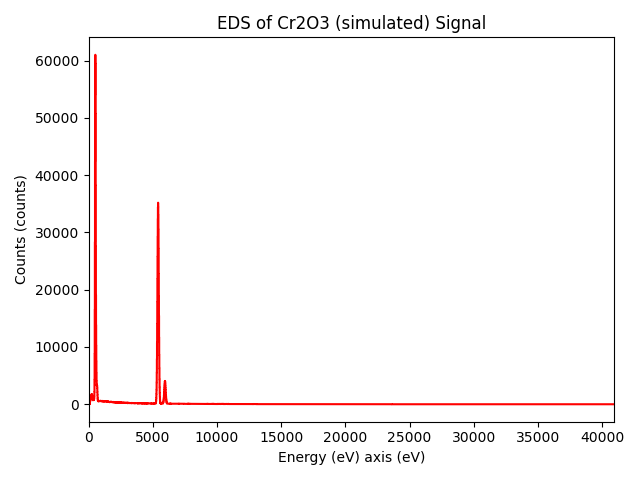

In [9]:
eds.plot()

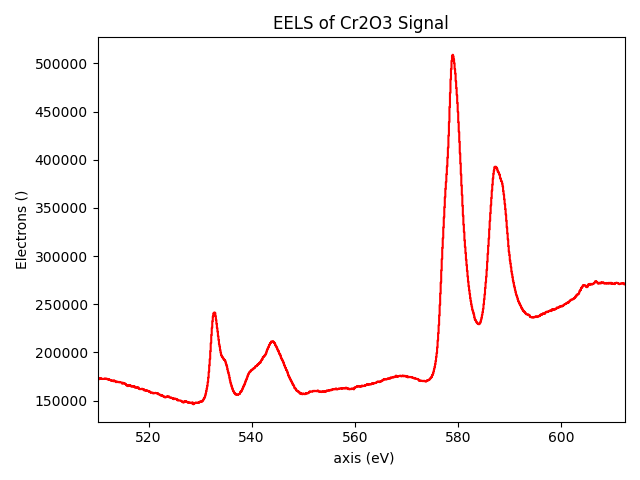

In [10]:
eels.plot()

The **energy dispersion** (eV/channel) is smaller for EELS (= higher energy resolution):

In [53]:
print(f'EDS energy dispersion:\t{eds.axes_manager[-1].scale:.1f} {eds.axes_manager[-1].units}/channel')
print(f'EELS energy dispersion:\t{eels.axes_manager[-1].scale:.1f} {eels.axes_manager[-1].units}/channel') 

EDS energy dispersion:	10.0 eV/channel
EELS energy dispersion:	0.1 eV/channel


For EDS, the [Fano factor](https://en.wikipedia.org/wiki/Fano_factor) ultimately limits the achievable detector resolution. For a Si detector, the limit is about 120 eV at 5.9 keV (Mn K$\alpha$) and commercial detectors are already quite close to this limit.  
Therefore, for EDS there is no benefit in using too small energy dispersions.

For EELS, the energy resolution is given by the electron source. A Schottky field-emission gun (FEG) has an energy spread of about 0.7 eV, whereas a cold FEG has about 0.3 eV.  
In addition, monochromators can be used to increase the energy resolution down to a few meV in modern instruments.

The **energy range** is larger for EDS (= all/more elements can be analyzed simultaneously):


In [62]:
print(f'EDS energy range:\t{eds.axes_manager.signal_extent[0]:.1f} to {eds.axes_manager.signal_extent[1]:.1f} {eds.axes_manager[-1].units}')
print(f'EELS energy range:\t{eels.axes_manager.signal_extent[0]:.1f} to {eels.axes_manager.signal_extent[1]:.1f} {eels.axes_manager[-1].units}')

EDS energy range:	0.0 to 40950.0 eV
EELS energy range:	510.1 to 612.4 eV


## Plot both spectra
First, we plot both spectra without any scaling. Note how the EDS signal covers a larger energy region, whereas the EELS signal is barely visible as a vertical line in these axis limits.

<AxesSubplot:xlabel=' (eV)', ylabel='Intensity'>

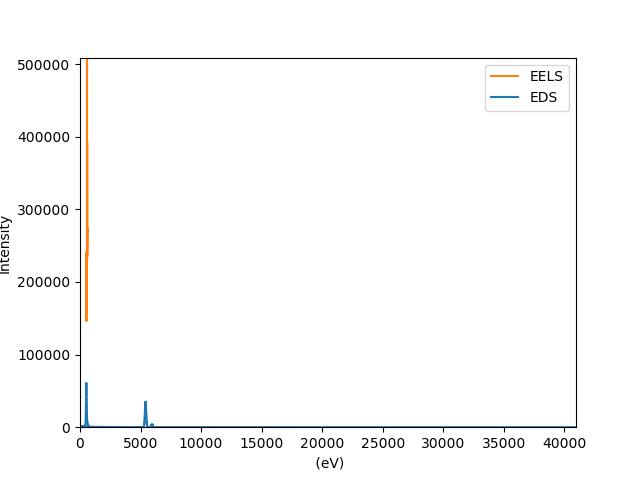

In [11]:
hs.plot.plot_spectra([eds, eels], drawstyle='steps-mid', legend=['EDS', 'EELS'])

## Plot both spectra with some scaling
Let's zoom into the low-energy region between 450 and 600 keV (Cr L and O K core losses) where both spectra have signal.  
We also normalize each spectrum by its maximum value to account for differences in total signal. This enables us to see qualitative differences between the spectra.

<AxesSubplot:xlabel=' (eV)', ylabel='Intensity'>

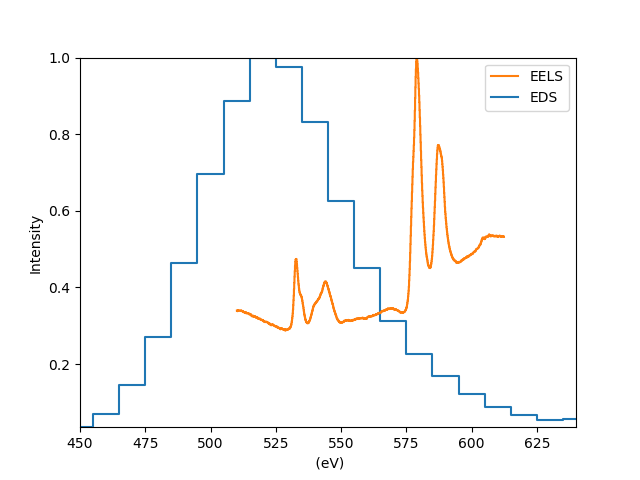

In [12]:
lims = (450.0, 650.0)

eds_plt = eds.isig[lims[0]:lims[1]].deepcopy()
eels_plt = eels.isig[lims[0]:lims[1]].deepcopy()

hs.plot.plot_spectra([eds_plt / np.max(eds_plt.data), eels_plt / np.max(eels_plt.data)], drawstyle='steps-mid', legend=['EDS', 'EELS'])

## Plot both spectra with some scaling, add some markers
Now we also add some markers for the edges and x-ray transition energies.

Text(519.9, 0.8, 'O K$\\alpha$')

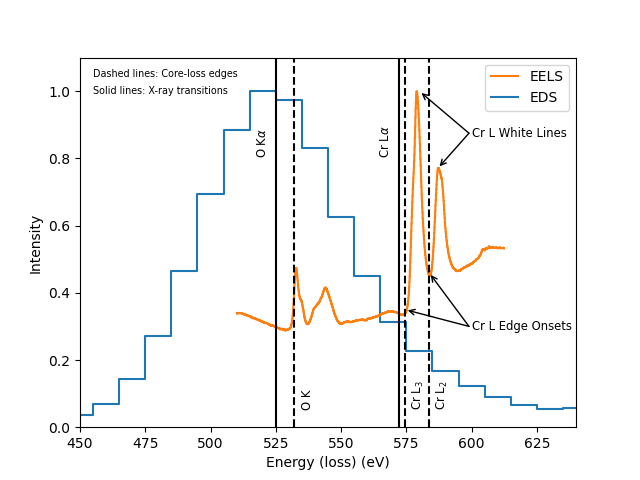

In [45]:
lims = (450.0, 650.0)

eds_plt = eds.isig[lims[0]:lims[1]].deepcopy()
eels_plt = eels.isig[lims[0]:lims[1]].deepcopy()

hs.plot.plot_spectra([eds_plt / np.max(eds_plt.data), eels_plt / np.max(eels_plt.data)], drawstyle='steps-mid', legend=['EDS', 'EELS'])

fig, ax = plt.gcf(), plt.gca()
ax.set_ylim((0,1.1))
ax.set_xlabel('Energy (loss) (eV)')

# Annotations
ax.annotate('', xy=(580.0, 1.0), xytext=(599.0, 0.875), arrowprops=dict(arrowstyle="->", shrinkA=0))
ax.annotate('', xy=(587.0, 0.77), xytext=(599.0, 0.875), arrowprops=dict(arrowstyle="->", shrinkA=0))
ax.annotate('Cr L White Lines', xy=(580.0, 1.0), xytext=(600.0, 0.875), va='center', ha='left', fontsize='small')

ax.annotate('', xy=(574.5, 0.35), xytext=(599.0, 0.3), arrowprops=dict(arrowstyle="->", shrinkA=0))
ax.annotate('', xy=(583.7, 0.46), xytext=(599.0, 0.3), arrowprops=dict(arrowstyle="->", shrinkA=0))
ax.annotate('Cr L Edge Onsets', xy=(574.5, 0.35), xytext=(600.0, 0.3), va='center', ha='left', fontsize='small')

ax.text(lims[0]+5, 1.05, 'Dashed lines: Core-loss edges', va='center', ha='left', fontsize='x-small')
ax.text(lims[0]+5, 1.0, 'Solid lines: X-ray transitions', va='center', ha='left', fontsize='x-small')

### EELS edges ###
# Cr L
x = 574.5 # Cr L3
ax.axvline(x=x, c='k', ls='--'); ax.text(x=x+5, y=0.05, s=r'Cr L$_3$', fontsize='small', rotation=90, ha='center', va='bottom')
x = 583.7 # Cr L2
ax.axvline(x=x, c='k', ls='--'); ax.text(x=x+5, y=0.05, s=r'Cr L$_2$', fontsize='small', rotation=90, ha='center', va='bottom')
#x = 694.6 # Cr L1
#ax.axvline(x=x, c='k', ls='--'); ax.text(x=x+5, y=0.05, s=r'Cr L$_1$', fontsize='small', rotation=90, ha='center', va='bottom')

# O K
x = 532.0 # O K
ax.axvline(x=x, c='k', ls='--'); ax.text(x=x+5, y=0.05, s='O K', fontsize='small', rotation=90, ha='center', va='bottom')

### EDS x-ray transitions ###
# Cr La
x = 572.2 # Cr La12
ax.axvline(x=x, c='k', ls='-'); ax.text(x=x-5, y=0.8, s=r'Cr L$\alpha$', fontsize='small', rotation=90, ha='center', va='bottom')

# O Ka
x = 524.9 # O Ka12
ax.axvline(x=x, c='k', ls='-'); ax.text(x=x-5, y=0.8, s=r'O K$\alpha$', fontsize='small', rotation=90, ha='center', va='bottom')

Note the intense "white lines" for the Cr L$_{2,3}$ edges at the start of the edge onsets.  
The region at the EELS edge onsets is called energy-loss near edge structure (ELNES) and is sensitive to local chemical bonding.